# YOLO based Logo Detector

In our project we are using YOLO v3 as an object detector to detect the Logo on any given web page.

The below notebook is a Branched notebook taken from original authors

* https://github.com/AlexeyAB/darknet

Our project is based on TensorFlow and TensorFlow JS so we will convert the Trained and Frozen Model (model.weights) into Graph Model (model.graph) and JSON Model (model.JSON)


## Step-1 Mounting the Google Drive

We need to mount the google drive as most of our configuration files need to be copied from drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step-2 Clone GitHub repo of Original YOLO:

The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.


In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 14924, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 14924 (delta 21), reused 34 (delta 20), pack-reused 14880
Receiving objects: 100% (14924/14924), 13.37 MiB | 21.29 MiB/s, done.
Resolving deltas: 100% (10139/10139), done.


In [ ]:
# !cd darknet

In [ ]:
# YOLO V3 pretrained weights
!wget https://pjreddie.com/media/files/darknet53.conv.74

# Yolo v4 custom pretrained weights
# !cp /content/drive/MyDrive/Initial_training_weights/yolov4.conv.137 /content/

# YOLO V4-tiny pretrained weights
# !cp /content/drive/MyDrive/Initial_training_weights/yolov4-tiny.conv.29 /content/

--2021-04-12 23:20:53--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  96.5MB/s    in 1.6s    

2021-04-12 23:20:55 (96.5 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!rm -r /content/darknet/cfg/*

##Step-3: Copy the configuration file from Drive:

Copy the configuration file from google drive.

Below are the changes carried out to the file:

1.  Classes.  
We have to change the number of classes according to our dataset. Search for the classes in the file, you’ll find the multiple results, so change the number of classes in the [yolo] sections. For example, if you are using 3 classes then make classes=3.

2.  Batch.  
This is the number of images chosen for each batch. You should choose this according to your size of system memory (GPU), but ideally, keep it 64.

```batch=64```

3.  Subdivisions.  
The batch is again divide into the blocks of images, keep it 16.

`subdivisions=16`

4.  Width and Height.  
By default width=608 and height = 608, you can keep it as it is but if you want to change it then make sure that the number should be a multiple of 32.

5. Max Batches.  
It is the maximum number of batches you want to run for training.


`max_batches = (number of classes) * 2000`

    This can’t be less than 4000 even you are using 1 class. if you are using 2 classes then it should be 4000 and for 3 classes it should be 6000. Use the result of the equation in cfg file, which would be number.

6. Steps.  
Steps should be 80% and 90% of the max_batches. If the max_batches = 6000 then steps would be,


`steps=4800,5400`

7. Filters.  
Check for filters=255, you will find 3 results in [convolutional] section just before [yolo] section. Change it with the result of the following calculation,


`filters=(classes + 5)x3`  

    So for 1 class, it will be filters=18 and for 2 classes it will be filters=21. Don’t write the equation in the cfg file, write the resultant value ( a number).

In [ ]:
# YOLO V4-tiny
# !cp /content/drive/MyDrive/Config_files/yolov4-tiny.cfg /content/darknet/cfg

# Yolo V4 Custom Config File
# !cp /content/drive/MyDrive/Config_files/yolov4-custom.cfg /content/darknet/cfg

# YOLO V3 Custom Config File
!cp /content/drive/MyDrive/Config_files/yolo-obj.cfg /content/darknet/cfg

In [ ]:
# !rm darknet/Makefile

##Step-4: Copy the Custom Dataset from Drive to Local


In [ ]:
# !cp /content/drive/MyDrive/Makefile /content/darknet

In [ ]:
!cp -r /content/drive/MyDrive/data /content/

In [ ]:
# !rm -r darknet/data/

In [ ]:
# Move Yolo V3 pre weights to data folder
!mv /content/darknet53.conv.74 /content/data

# Move Yolo V4 pre weights to data folder
# !mv /content/yolov4.conv.137 /content/data

# Move Yolo V4-tiny pre weights to data folder
# !mv /content/yolov4-tiny.conv.29 /content/data

##Step-5: Make the Neural network

We customize the Makefile to enable OPENCV and GPU for darknet and then build darknet.

Do not worry about any warnings when you run the '!make' cell!

In [ ]:
%cd darknet/

/content/darknet


In [ ]:
# %cd /content/darknet/

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

## Step-6: Defininig Helper Functions:

Creating some helper functions so we can visualize the output detected. These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections, as well as upload and download images to and from your Cloud VM.

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

##Step-7: Validate the GPU instances and Cores provided

The below code will help to validate the GPU instances provided and allocated in the COlab Session

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp37-none-any.whl size=7411 sha256=538a9ac9f968e4958f755c00dec8af2c86ae12666a341fd5c948ffc053d1242f
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 26.2 GB  |     Proc size: 119.5 MB
GPU RAM Free: 16160MB | Used: 0MB | Util   0% | Total     16160MB


In [ ]:
!pwd

/content/darknet


## Step-8: Train the model
Darknet is now built and ready to run detections using YOLOv3 in the cloud! You can find out which sorts of classes the pre-trained YOLOv3 weights can detect

The object detector can be run using the following command
```bash
!./darknet detector test <path to .data file> <path to config> <path to weights> <path to image>
```


**Note:** After running detections OpenCV can't open the image instantly in the cloud so we must run: 
```bash
imShow('predictions.jpg')
```
This will output the image with the detections shown. The most recent detections are always saved to 'predictions.jpg'

###**.names** file
We need to create a file that will have the name of all the classes (like classes.txt), so just create obj.names file inside the data folder

###**.data** file
This file contains the paths of other files and info about the number of classes. Create obj.data inside the data folder



In [ ]:
# YOLOV3 Custom Data training
!./darknet detector train ../data/obj.data cfg/yolo-obj.cfg ../data/darknet53.conv.74 -dont_show

# YOLOV4 Custom Data training
# !./darknet detector train ../data/obj.data cfg/yolo4-custom.cfg ../data/yolov4.conv.137

# YOLOV4-Tiny Custom Data training


# !./darknet detector train ../data/obj.data cfg/yolov4-tiny.cfg ../data/yolov4-tiny.conv.29 -dont_show -map

Streaming output truncated to the last 5000 lines.

 6359: 0.197949, 0.152100 avg loss, 0.001000 rate, 3.864351 seconds, 406976 images, 24.233291 hours left
Loaded: 0.000066 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.798814), count: 3, class_loss = 0.000010, iou_loss = 0.089105, total_loss = 0.089114 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 485617, rewritten_bbox = 0.669458 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), cou

In [ ]:
# !cat ../data/obj.data

In [ ]:
!cp -r /content/darknet/backup/ /content/drive/MyDrive/

In [ ]:
!cp -r /content/drive/MyDrive/backup/ /content/darknet/ 

##Step-9: Retrain from last checkpoint
Training is gonna take long time

This training keeps saving the weights after every 1000 iterations in the backup folder, so after every 1000 iterations, you can stop it and restart it from the same point.

So suppose you stopped the training after 500 iterations, then to restart from this point just run the following command.

In [ ]:
!./darknet detector train ../data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.888970), count: 2, class_loss = 0.000011, iou_loss = 0.015919, total_loss = 0.015929 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.843299), count: 3, class_loss = 0.027700, iou_loss = 0.042244, total_loss = 0.069944 
 total_bbox = 108740, rewritten_bbox = 0.629023 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000017, iou_loss = 0.000000, total_loss = 0.000017 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.889159), count: 3, class_loss = 0.006011, iou_loss = 0.062840, total_loss = 0.068850 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.850999), count: 4, class_loss = 0.000421, iou_loss = 0.068585, total_loss = 0.069006 
 total_bbox = 108747, rewritten_bbox = 0.628983 % 
v3 (m

In [ ]:
# !cp /content/drive/MyDrive/data/obj.data /content/
!cp /content/drive/MyDrive/data/obj.names /content/data/
# !mkdir ../data/
# !cp -r /content/darknet/backup/ /content/drive/MyDrive/log_dir1
# !cp /content/drive/MyDrive/backup/yolo-obj_final.weights /content/data/
# !cp /content/drive/MyDrive/Config_files/yolo-obj.cfg /content/data/
# !rm -r /content/darknet/cfg/
# !mkdir /content/darknet/cfg

In [ ]:
# !./darknet detector test ../data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_last.weights /content/drive/MyDrive/data/img/01F1KBFYXQMXGNE9TA0SB9ET56.png
!./darknet detector test ../data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_final.weights /content/capture.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 12

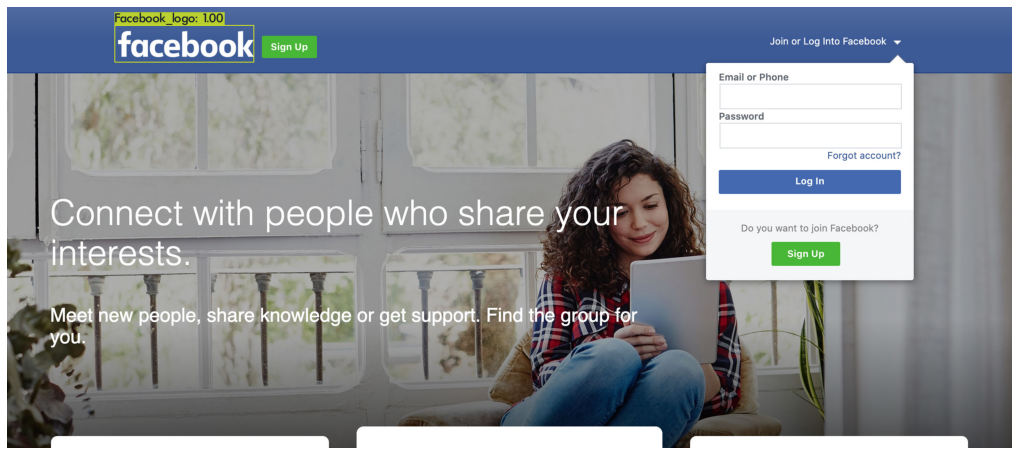

In [ ]:
imShow('predictions.jpg')

In [ ]:
# !cp drive/MyDrive/ darknet/backup/

In [ ]:
# !cp drive/MyDrive/data darknet/backup/

##Step-10: Copy the Model back to Google Drive

In [ ]:
!cp -r /content/darknet/backup /content/drive/MyDrive/data/

# Model Conversion:

This is the second part of the Notebook where we convert the saved model.weights into a JSON model and then a H5 model to be used for our Back-End application

Converting a model to JSOn is a two step process. First we need to convert the model into a Graph Model --> This is followed by conversion to JSON Model

## Step-1: Change the tensorflow version to 1.x

Since the helper code we are using for model conversion is created in tensorflow 1.x we need to change our tf version to 1.x from 2.x

In [ ]:
!pip install tensorflow==1.13.1
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 92.6MB 74kB/s 
     |████████████████████████████████| 3.2MB 39.5MB/s 
     |████████████████████████████████| 368kB 47.2MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


## Step-2: Clone the GitHub repo

The below github repository from Mystic 123 will help us to convert the model.weights into a Graph model

In [ ]:
!git clone https://github.com/mystic123/tensorflow-yolo-v3.git

Cloning into 'tensorflow-yolo-v3'...
remote: Enumerating objects: 219, done.
remote: Total 219 (delta 0), reused 0 (delta 0), pack-reused 219
Receiving objects: 100% (219/219), 57.63 KiB | 9.60 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [ ]:
%cd tensorflow-yolo-v3
!git checkout ed60b90

/content/tensorflow-yolo-v3
Note: checking out 'ed60b90'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at ed60b90 Merge pull request #53 from alexzhangxx/small_change


## Step-3: Copy the configuration file from Drive

In [ ]:
!cp /content/drive/MyDrive/data/obj.names /content/

In [ ]:
# Copy for YOLO v3 weights 
!cp /content/drive/MyDrive/data/backup/yolo-obj_last.weights /content/

# Uncomment the below line if converting to the JSON model. Comment the above line
# !cp /content/drive/MyDrive/YOLO4-tiny_GraphModel_Weights/yolov4-tiny_best.weights /content/

##Step-4: Converting the Model.weights to Model.graph

* Based on the method proposed by Mystic.
* Tested on YOLO v3 and v3-tiny
* The file saves the output frozen graph with the same name `frozen_darknet_yolov3_model.pb` 

    ```So, make sure to save/rename the result before running the below command.```


In [ ]:
!python3 convert_weights_pb.py --class_names /content/obj.names --data_format NHWC --ckpt_file --weights_file /content/yolo-obj_last.weights 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

##Step-5: Copy the saved Graph Model into Drive

In [ ]:
# !cp /content/tensorflow-yolo-v3/frozen_darknet_yolov3_model.pb /content/drive/MyDrive/data/backup/

In [ ]:
!cp /content/tensorflow-yolo-v3/frozen_darknet_yolov3_model.pb /content/

In [ ]:
!pip3 install --user gast==0.2.2

  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=8a62e4c46a61285446198db1684c79db60f8b3b16a169109ddc0ab643dee1991
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


In [ ]:

# !python3 mo_tf.py
# --input_model /path/to/yolo_v3.pb
# --transformations_config $MO_ROOT/extensions/front/tf/yolo_v3.json
# --batch 1

##Step-6: Install TensorFlow JS

TensorFlow GraphDef based models (typically created via the Python API) may be saved in one of following formats:

* TensorFlow SavedModel
* Frozen Model

All of the above formats can be converted by the TensorFlow.js converter into a format that can be loaded directly into TensorFlow.js for inference.

Importing a TensorFlow model into TensorFlow.js is a two-step process. First, convert an existing model to the TensorFlow.js web format, and then load it into TensorFlow.js.

Source: [Tensorflow.org](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model)


**Note**: This step will also upgrade your TF from 1.x to 2.x so make sure everything is saved and copied to a drive as this will require restarting the Run Time and will result in loss of variables 

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 2.2MB/s 
     |████████████████████████████████| 112kB 9.1MB/s 
     |████████████████████████████████| 394.3MB 35kB/s 
     |████████████████████████████████| 10.6MB 45.1MB/s 
     |████████████████████████████████| 471kB 49.0MB/s 
  Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Found existing installation: tensorboard 1.13.1
    Uninstalling tensorboard-1.13.1:
      Successfully uninstalled tensorboard-1.13.1
  Found existing installation: tensorflow-estimator 1.13.0
    Uninstalling tensorflow-estimator-1.13.0:
      Successfully uninstalled tensorflow-estimator-1.13.0
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


##Step-7: Tensorboard visualization of Model

For Tensorflow JS to convert the model we need to know the output layers. One way to get the output layer is by directly visualizing the model using tensorboard. Hence configuring the Tensorboard below

In [ ]:
!mkdir /content/log_dir1/

In [ ]:
from tensorflow.core.framework import graph_pb2
from tensorflow.python.client import session
from tensorflow.python.framework import importer
from tensorflow.python.framework import ops
from tensorflow.python.platform import app
from tensorflow.python.platform import gfile
from tensorflow.python.summary import summary
from tensorflow.compat.v1 import GraphDef


def import_to_tensorboard(model_dir, log_dir):
  """View an imported protobuf model (`.pb` file) as a graph in Tensorboard.
  Args:
    model_dir: The location of the protobuf (`pb`) model to visualize
    log_dir: The location for the Tensorboard log to begin visualization from.
  Usage:
    Call this function with your model location and desired log directory.
    Launch Tensorboard by pointing it to the log directory.
    View your imported `.pb` model as a graph.
  """
  with session.Session(graph=ops.Graph()) as sess:
    with gfile.FastGFile(model_dir, "rb") as f:
      graph_def = GraphDef()
      graph_def.ParseFromString(f.read())
      importer.import_graph_def(graph_def)

    pb_visual_writer = summary.FileWriter(log_dir)
    pb_visual_writer.add_graph(sess.graph)
    print("Model Imported. Visualize by running: "
          "tensorboard --logdir={}".format(log_dir))


def main(unused_args):
  import_to_tensorboard(FLAGS.model_dir, FLAGS.log_dir)

# if __name__ == "__main__":
#   parser = argparse.ArgumentParser()
#   parser.register("type", "bool", lambda v: v.lower() == "true")
#   parser.add_argument(
#       "--model_dir",
#       type=str,
#       default="",
#       required=True,
#       help="The location of the protobuf (\'pb\') model to visualize.")
#   parser.add_argument(
#       "--log_dir",
#       type=str,
#       default="",
#       required=True,
#       help="The location for the Tensorboard log to begin visualization from.")
#   FLAGS, unparsed = parser.parse_known_args()
#   app.run(main=main, argv=[sys.argv[0]] + unparsed)

In [ ]:
import_to_tensorboard("/content/frozen_darknet_yolov3_model.pb", "/content/log_dir1")

Model Imported. Visualize by running: tensorboard --logdir=/content/log_dir1


In [ ]:
# # Load the TensorBoard notebook extension
# %load_ext tensorboard

# %tensorboard --logdir=/content/log_dir1

!tensorboard dev upload --logdir ./log_dir1/ \
  --name "YOLO_Graph_Model_Visualization" \
  --description "Visualizing the layers of YOLO model" \
  --one_shot

2021-03-29 23:00:35.434346: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./log_dir1/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Ao

In [ ]:
!cp -r log_dir1/ /content/drive/MyDrive

##Step-8: Alternative way to visualize layers

Below is another way in which the layers can be seen by printing each layer name and then selecting the one which is directly contributing to output

In [ ]:
import tensorflow as tf

graph_file = '/content/frozen_darknet_yolov3_model.pb'
graph_def = tf.compat.v1.GraphDef()
with open(graph_file, "rb") as f:
  graph_def.ParseFromString(f.read())
  for node in graph_def.node:
    print(node.name)

inputs
detector/truediv/y
detector/truediv
detector/darknet-53/Conv/weights
detector/darknet-53/Conv/weights/read
detector/darknet-53/Conv/Conv2D
detector/darknet-53/Conv/BatchNorm/gamma
detector/darknet-53/Conv/BatchNorm/gamma/read
detector/darknet-53/Conv/BatchNorm/beta
detector/darknet-53/Conv/BatchNorm/beta/read
detector/darknet-53/Conv/BatchNorm/moving_mean
detector/darknet-53/Conv/BatchNorm/moving_mean/read
detector/darknet-53/Conv/BatchNorm/moving_variance
detector/darknet-53/Conv/BatchNorm/moving_variance/read
detector/darknet-53/Conv/BatchNorm/FusedBatchNorm
detector/darknet-53/Conv/LeakyRelu
detector/darknet-53/Pad/paddings
detector/darknet-53/Pad
detector/darknet-53/Conv_1/weights
detector/darknet-53/Conv_1/weights/read
detector/darknet-53/Conv_1/Conv2D
detector/darknet-53/Conv_1/BatchNorm/gamma
detector/darknet-53/Conv_1/BatchNorm/gamma/read
detector/darknet-53/Conv_1/BatchNorm/beta
detector/darknet-53/Conv_1/BatchNorm/beta/read
detector/darknet-53/Conv_1/BatchNorm/moving_m

In [ ]:
!mkdir /content/web_model

##Step-9 Converting Graph Model to JSON Model:

Converter generated files
The conversion script above produces two types of files:

* model.json (the dataflow graph and weight manifest)
* group1-shard\*of\* (collection of binary weight files)

In [ ]:
!tensorflowjs_converter --help

2021-03-29 23:32:27.305458: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
usage: TensorFlow.js model converters. [-h]
                                       [--input_format {tf_hub,tfjs_layers_model,keras,tf_frozen_model,keras_saved_model,tf_saved_model}]
                                       [--output_format {keras_saved_model,keras,tfjs_layers_model,tfjs_graph_model}]
                                       [--signature_name SIGNATURE_NAME]
                                       [--saved_model_tags SAVED_MODEL_TAGS]
                                       [--quantize_float16 [QUANTIZE_FLOAT16]]
                                       [--quantize_uint8 [QUANTIZE_UINT8]]
                                       [--quantize_uint16 [QUANTIZE_UINT16]]
                                       [--quantization_bytes {1,2}]
                                       [--split_weights_by_layer] [--version]
                           

In [ ]:
# import tensorflowjs

!tensorflowjs_converter /content/frozen_darknet_yolov3_model.pb /content/web_model/ --input_format tf_frozen_model --output_node_names 'output_boxes'

    # import/output_boxes

2021-03-29 23:47:02.614021: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-03-29 23:47:09.818928: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:928] Optimization results for grappler item: graph_to_optimize
  debug_stripper: debug_stripper did nothing. time = 6.033ms.
  model_pruner: Graph size after: 814 nodes (-372), 860 edges (-372), time = 40.76ms.
  constant_folding: Graph size after: 710 nodes (-104), 753 edges (-107), time = 494.433ms.
  arithmetic_optimizer: Graph size after: 711 nodes (1), 755 edges (2), time = 87.507ms.
  dependency_optimizer: Graph size after: 698 nodes (-13), 741 edges (-14), time = 12.927ms.
  model_pruner: Graph size after: 698 nodes (0), 741 edges (0), time = 4.096ms.
  constant_folding: Graph size after: 696 nodes (-2), 739 edges (-2), time = 185.608ms.
  arithmetic_optimizer: Graph size after: 696 nodes (0), 739 edges (0), time = 88.62ms.
  dependency_optimizer: Graph

In [ ]:
!cp -r web_model/* /content/drive/MyDrive/YOLO_Model_JSON

##Step10: Converting the Graph Model to H5 model

Here we are using the repository created bu qqwweee wherein we can use the convert.py file and convert the Graph model to H5 model to be used in our repository

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [ ]:
!git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.08 KiB | 2.01 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [ ]:
!cp /content/drive/MyDrive/YOLOV3_Trained_GraphModel_and_WeightsModel/yolo-obj_last.weights /content/keras-yolo3/

In [ ]:
!cp /content/drive/MyDrive/Config_files/yolo-obj.cfg /content/keras-yolo3/

In [ ]:
%cd keras-yolo3/

/content/keras-yolo3


In [ ]:
!python convert.py yolo-obj.cfg yolo-obj_last.weights model_data/yolo.h5

2021-04-12 05:48:08.420449: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Loading weights.
Weights Header:  0 2 5 [345600]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
2021-04-12 05:48:10.923392: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-12 05:48:10.965254: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-12 05:48:11.068380: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-04-12 05:48:11.068474: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (43870611c945): /proc/driver/nvidia/version does not exist
2021-04-12 05:48:11.069374: I ten

In [ ]:
!cp /content/keras-yolo3/model_data/yolo.h5 /content/drive/MyDrive/YOLOV3_Trained_GraphModel_and_WeightsModel

# Conclusion:

The entire Notebook is divided into two parts:

1.   Part-1 is about Training the YOLO model with a Custom Dataset
2.   Part-2 is about converting the Darknet model into JSON and H5 model

We have used the H5 model for our Back-End Application wherein we are detecting the LOgo. The entire Back-End is hosted on AWS and the information between Front-End JS application and Back-End application is passed through a REST API. The Back-End application is a Flask based application which taken input based on POST and returns an encoded output
